## Data Gathering
This notebook contains code for fetching data required for this project from varied sources. We will be fetching data from following sources

 - Google trends
 - Google news
 - Twitter
 - Reddit
 - Bitcoin API

## Google trends data using pytrends api

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360) # initiate connection to google trends

# set the required keywords and build the payload required for quering google trends
kw_list = ["bitcoin","btc","buy bitcoin","sell bitcoin"]
pytrends.build_payload(kw_list)

In [3]:
# fetch interet over time data from google trends for above mentioned keyword and store to the dataframe
# for documentation on pytrends api to customize the query visit https://github.com/GeneralMills/pytrends

df = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, 
                                      year_end=2018, month_end=5, day_end=31, hour_end=0, 
                                      cat=0, geo='', gprop='', sleep=0)

# save the dataframe to a csv file for further use
df.to_csv('./data/google.csv')


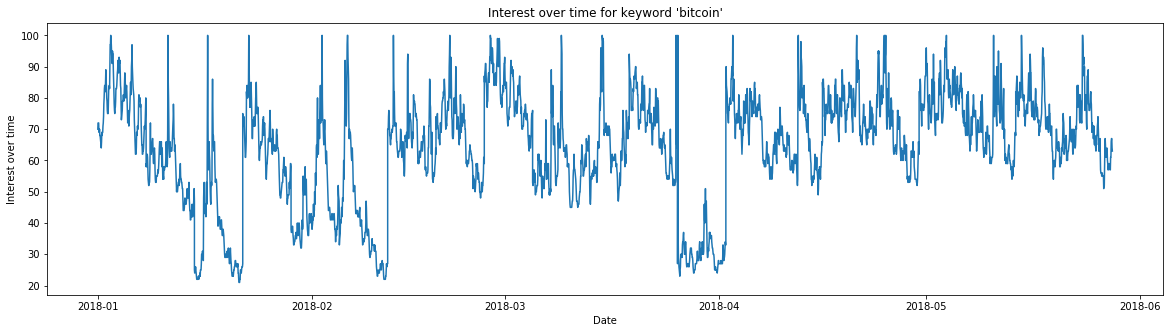

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the interest over time data 
plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Interest over time')
plt.title('Interest over time for keyword \'bitcoin\'')
plt.plot(df.index,df.bitcoin)


## Google news data using webhose api

In [14]:
type(webhose_key)

str

In [9]:
import webhoseio
import json
# store access token of api in file .webhose.txt and fetch the same 
file = open(".webhose.txt","r") 
webhose_key = file.readline()
file.close()

# setup connection with the api
webhoseio.config(token="69af6a92-1446-4129-92ce-e0209947762b")
#webhoseio.config(token=webhose_key)

query_params = {
    "q": "\"bitcoin\" language:english is_first:true thread.title:bitcoin",
    "ts": "1525903350122",
    "sort": "thread.published"}

output = webhoseio.query("filterWebContent", query_params)
    
# Get the next batch of posts

#output = webhoseio.get_next()


In [10]:
output.keys()

dict_keys(['posts', 'totalResults', 'moreResultsAvailable', 'next', 'requestsLeft'])

In [11]:
with open('./data/news/news1.txt', 'w') as f:
  json.dump(output, f, ensure_ascii=False)

In [12]:
output['moreResultsAvailable']

32107

In [2]:
'./data/news'+str(1)+'.txt'

'./data/news1.txt'

In [ ]:
i = 2
while output['moreResultsAvailable'] > 0:
    output = webhoseio.get_next()
    label = './data/news/news'+str(i)+'.txt'
    with open(label, 'w') as f:
        json.dump(output, f, ensure_ascii=False)
    i += 1